## Chapter 32: Olympic Data

In [1]:
using CSV, DataFrames, Chain, CairoMakie, Statistics
CairoMakie.activate!()
Makie.inline!(true)
ENV["DATAFRAMES_ROWS"] = 10

10

In [2]:
olympics = CSV.read("../data/olympic-athletes.csv", DataFrame, missingstring = "NA")

Row,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
,Int64,String,String1,Int64?,Int64?,Float64?,String,String3,String15,Int64,String7,String31,String31,String,String7?
1,1,A Dijiang,M,24,180,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,missing
2,2,A Lamusi,M,23,170,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,missing
3,3,Gunnar Nielsen Aaby,M,24,missing,missing,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,missing
4,4,Edgar Lindenau Aabye,M,34,missing,missing,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,5,Christine Jacoba Aaftink,F,21,185,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,missing
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
271112,135569,Andrzej ya,M,29,179,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,missing
271113,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",missing
271114,135570,Piotr ya,M,27,176,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",missing


Note that the dataset uses "NA" if the data is missing.  the option `missingstring = "NA"` puts in the missing value into the dataframe when this happens.  The following is all of the variables (columns):

In [3]:
names(olympics)

15-element Vector{String}:
 "ID"
 "Name"
 "Sex"
 "Age"
 "Height"
 "Weight"
 "Team"
 "NOC"
 "Games"
 "Year"
 "Season"
 "City"
 "Sport"
 "Event"
 "Medal"

In [4]:
olympics.Event

271116-element Vector{String}:
 "Basketball Men's Basketball"
 "Judo Men's Extra-Lightweight"
 "Football Men's Football"
 "Tug-Of-War Men's Tug-Of-War"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 "Speed Skating Women's 500 metres"
 "Speed Skating Women's 1,000 metres"
 ⋮
 "Football Men's Football"
 "Rowing Men's Lightweight Coxless Fours"
 "Rowing Men's Lightweight Coxless Fours"
 "Basketball Women's Basketball"
 "Luge Mixed (Men)'s Doubles"
 "Ski Jumping Men's Large Hill, Individual"
 "Ski Jumping Men's Large Hill, Team"
 "Bobsleigh Men's Four"
 "Bobsleigh Men's Four"

### 1. What is the total number of medals given in all Olympics in the dataset?

In [6]:
@chain olympics begin
  dropmissing(:Medal)
  nrow
end

39783

### 2. Collectively taking all Summer games, list the top 10 athletes with medals.

In [19]:
@chain olympics begin
  dropmissing(:Medal)
  subset(:Season => s-> s .== "Summer")
  groupby(:ID)
  combine(:Name => first , nrow => :Num_Medals)
  sort(:Num_Medals, rev = true)
  first(10)
end

Row,ID,Name_first,Num_Medals
,Int64,String,Int64
1,94406,"Michael Fred Phelps, II",28
2,67046,Larysa Semenivna Latynina (Diriy-),18
3,4198,Nikolay Yefimovich Andrianov,15
4,74420,Edoardo Mangiarotti,13
5,89187,Takashi Ono,13
6,109161,Borys Anfiyanovych Shakhlin,13
7,23426,Natalie Anne Coughlin (-Hall),12
8,35550,Birgit Fischer-Schmidt,12
9,57998,Sawao Kato,12


### 3. List the top 5 countries with medals in the Winter Olympics.

In [28]:
@chain olympics begin
  dropmissing(:Medal)
  subset(:Season => s -> s .== "Winter")
  groupby(:NOC)
  combine(:Team => first => :Team, nrow => :Num_Medals)
  sort(:Num_Medals, rev = true)
  first(5)
end

Row,NOC,Team,Num_Medals
,String3,String,Int64
1,USA,United States,635
2,CAN,Canada,611
3,NOR,Norway,443
4,URS,Soviet Union,440
5,SWE,Sweden,428


### 4. Doing a comparison bar plot of average weight of athletes in the summer and winter olympics by sex. 

Before doing that here is a simple grouped bar plot:

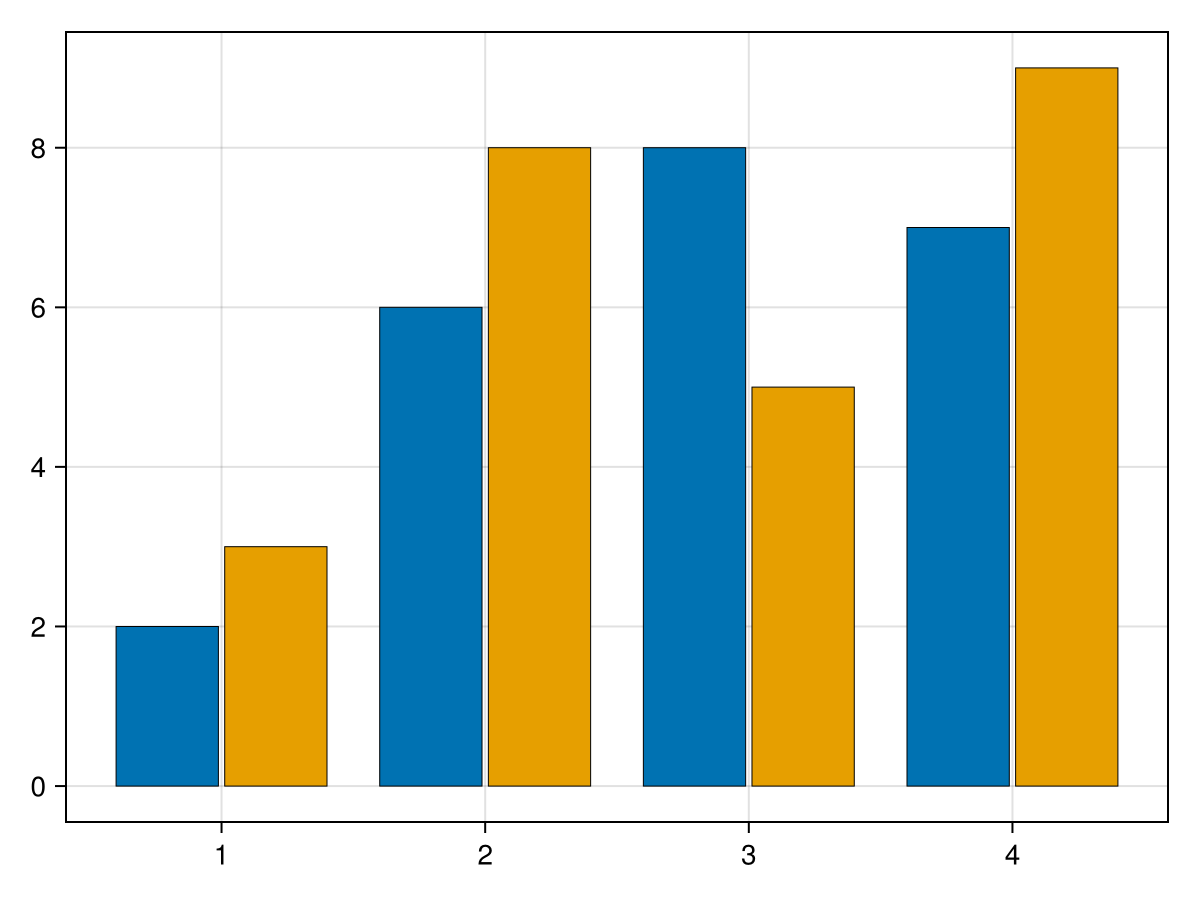

In [29]:
h1 = [2, 6, 8, 7]
h2 = [3, 8, 5, 9]
x = [1, 2, 3, 4]
colors =Makie.wong_colors()
fig = barplot(vcat(x,x),vcat(h1,h2),
  dodge = repeat(1:2,inner=4),
  color=colors[repeat(1:2,inner=4)],
  strokewidth = 0.5
)

In [31]:
repeat(1:2,inner=4)

8-element Vector{Int64}:
 1
 1
 1
 1
 2
 2
 2
 2

In [34]:
weight = @chain olympics begin
  dropmissing(:Weight)
  groupby([:Sex, :Season])
  combine(:Weight => mean)
end

Row,Sex,Season,Weight_mean
,String1,String7,Float64
1,M,Summer,75.6042
2,M,Winter,76.3571
3,F,Summer,60.0876
4,F,Winter,59.7552


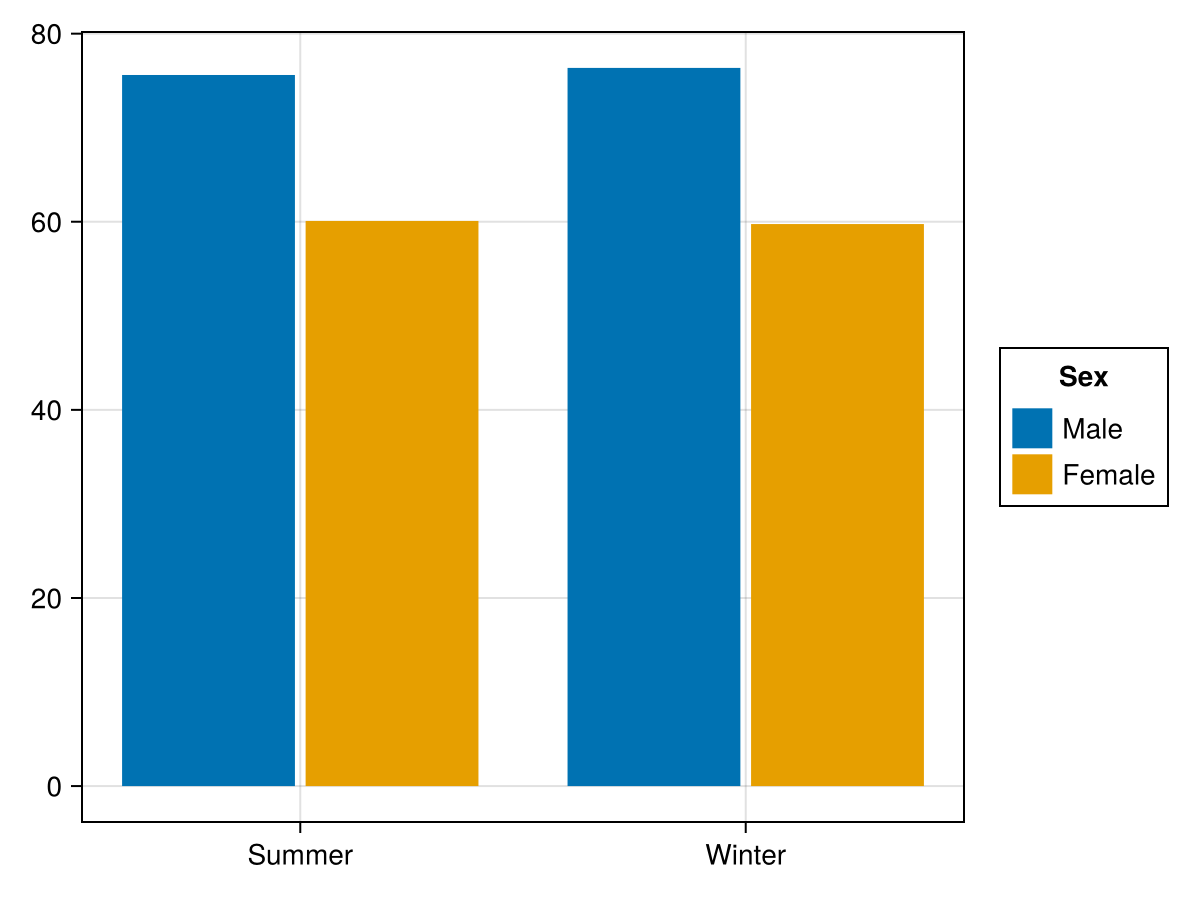

In [35]:
colors = Makie.wong_colors()
fig = Figure()
ax = Axis(fig[1,1], xticks=([1, 2], ["Summer", "Winter"]))
barplot!(ax, [1, 2, 1, 2], weight.Weight_mean, dodge = [1,1,2,2], color = colors[[1,1,2,2]])

# Legend
labels = ["Male", "Female"]
elements = [PolyElement(polycolor = colors[i]) for i in 1:length(labels)]
title = "Sex"

Legend(fig[1,2], elements, labels, title)
fig

### 4) Produce a line graph of the mean height of athletes per games over the years.  Graph men and women with different colors

In [42]:
height = @chain olympics begin
  dropmissing(:Height)
  groupby([:Year, :Sex])
  combine(:Height => mean)
  unstack(:Sex, :Height_mean)
end


Row,Year,M,F
,Int64,Float64?,Float64?
1,1896,172.739,missing
2,1900,176.638,missing
3,1904,175.789,missing
4,1906,178.206,missing
5,1908,177.543,missing
⋮,⋮,⋮,⋮
31,2008,181.254,169.5
32,2010,180.433,167.296
33,2012,181.634,169.732


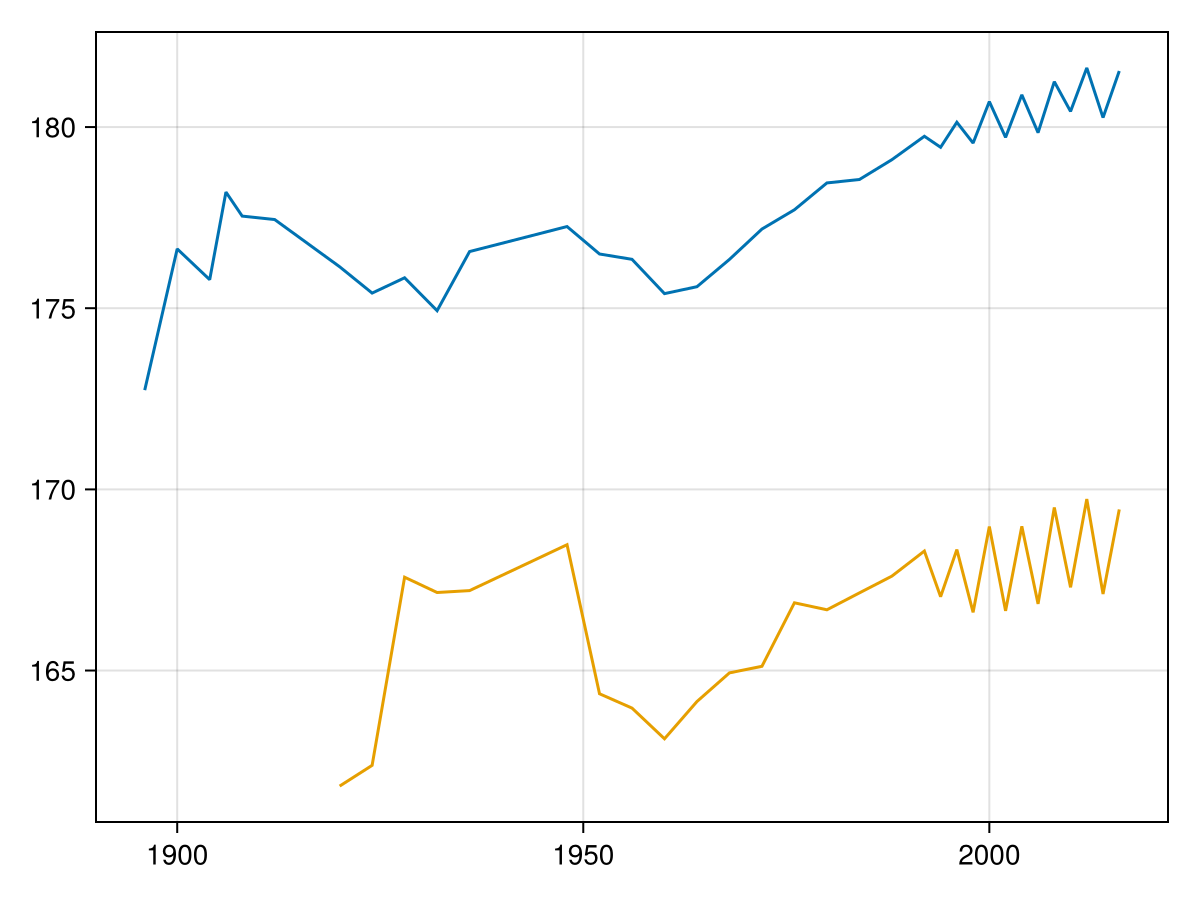

In [40]:

fig = Figure()
ax = Axis(fig[1,1])
lines!(ax,height.Year, height.M)
lines!(ax, height.Year, height.F)
fig

### Find the mean and standard deviation of ages of all summer athletes between 1950 and 1980.

In [45]:
@chain olympics begin
    dropmissing(:Age)
    subset([:Season, :Year] => (s, yr) -> @. s == "Summer" && 1950 <= yr <= 1980)
    combine(:Age => mean, :Age => std)
end

Row,Age_mean,Age_std
,Float64,Float64
1,24.7706,6.05815
